# For another notebook

In [1]:
# https://medium.com/@media_73863/machine-learning-for-sports-betting-not-a-basic-classification-problem-b42ae4900782
# https://medium.com/vantageai/beating-the-bookies-with-machine-learning-7b429a0b5980

from keras.layers import BatchNormalization, Dense, Input, Dropout
from keras.models import Model
from keras import backend as K
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

def get_model(input_dim, output_dim, base=1000, multiplier=0.25, p=0.2):
    inputs = Input(shape=(input_dim,))
    l = BatchNormalization()(inputs)
    l = Dropout(p)(l)
    n = base
    l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(p)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(p)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    outputs = Dense(output_dim, activation='softmax')(l)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='Nadam', loss=bet_loss)
    return model


Using TensorFlow backend.


In [2]:
## 2D binning of profits

In [3]:
def histo_profits(models, prob_range = np.arange(0, 0.15, 0.01), ):
    preds = np.concatenate(models[1])
    odds = pd.concat(models[2])
    
    probs = 1./ odds.abs() 
    
    profits = np.zeros( (len(prob_range), len(odd_range), 3))
    for i, ii in zip(prob_range, range(len(prob_range))):
        pr = ((preds - probs) >= i) & ((preds-probs)<i+0.01)
        for th, tt in zip(odd_range, range(len(odd_range))):

            oa = odds.abs()
            tr = ( oa >= th) & (oa < th+0.1)

            sel = pr & tr

            profits[ii, tt, :] = (sel * (odds.clip(0,np.inf) - 1)).sum().values
            
    labels = 'HAD'
    r = pd.concat({ labels[i]: pd.DataFrame(profits[:,:,i], columns=odd_range, index=prob_range) for i in range(3)}, axis=0)            
    r.index = r.index.rename(['Location','Probability'])
            
    return r

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(pr.loc['H'].values, cmap='PuOr')
plt.colorbar()

## More loss functions

In [6]:
_EPSILON = 10e-8

def cat_loss(b_true, y_pred):
    prob_true = K.clip(b_true, 0., 1.)
    prob = K.clip(y_pred, _EPSILON, 1. - _EPSILON)
    res = K.sum(prob_true * -K.log(prob), axis=-1)
    return res

def weighted_cat_loss(b_true, y_pred):
    prob_true = K.clip(b_true, 0., np.inf)
    prob = K.clip(y_pred, _EPSILON, 1. - _EPSILON)
    res = K.sum(prob_true * -K.log(prob), axis=-1)
    return res

def bet_loss(b_true, y_pred):
    profit = K.clip(b_true, 0., np.inf) - 1
    prob = K.clip(y_pred, _EPSILON, 1. - _EPSILON)
    res2 = K.sum(profit * prob, axis=-1)
    return -res2


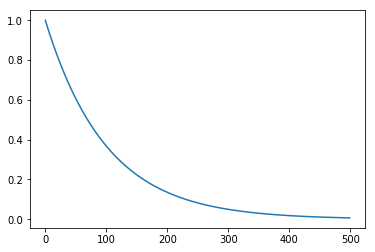

In [8]:
import math
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
plt.plot(np.exp(-np.arange(0,5,0.01)))

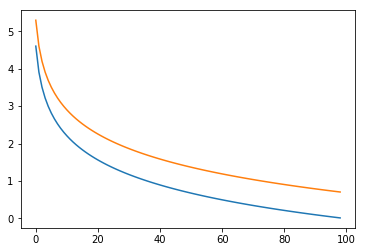

In [9]:
plt.plot(-np.log(np.arange(0.01,1,0.01))  )
plt.plot(-np.log(0.5 * np.arange(0.01,1,0.01)))

# Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


In [2]:
!where python

C:\Users\amjmr\GitHub\MakingMoneyML\venv\Scripts\python.exe
C:\Python36\python.exe


# Disable GPU

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

In [1]:
import torch
torch.cuda.is_available()

True